<center>
<span style="font-family:Comic Sans MS; color:navy"><h2>Titanic Binary classfication</h2></span>
</center>

#  <span style="font-family:Comic Sans MS; color:navy"><h5>1:About DataSet</h5></span>
- <span style='font-family:comic Sans MS; color:navy'> Project Summary: The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.</span>

- <span style='font-family:comic Sans MS; color:navy'>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.</span>
<div>
    
</div>
<center>    
<img src="https://t2.gstatic.com/licensed-image?q=tbn:ANd9GcScs1kCii2vJENMwTk2oDcUTmdYuuuWIa60xfevnMjHPbCMjIlb5Ssl23u7DoW_BRgc", width="400",  height="300"/>
</center>

# <span style="font-family:Comic Sans MS; color:navy"><h5>2: Define the Problem</h5></span>
- <span style='font-family:comic Sans MS; color:navy'>In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy</span>
<div>

</div>
<center>    
<img src="https://www.titanicuniverse.com/wp-content/uploads/2022/08/how-many-people-survived-the-titanic-featured-930x620-1.jpg", width="400",  height="300"/>
</center>


# <span style="font-family:Comic Sans MS; color:navy"><h5>3:Import Libraries</h5></span>

In [303]:
# %pip install seaborn==0.11.0
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
#ignore warnings

import warnings
warnings.filterwarnings('ignore')

#for graphs, visuals, etc.
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno
# import plotly.express as px

# import cufflinks as cf
# cf.go_offline()

# for Modelling
from sklearn.model_selection import train_test_split
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('white')
# pylab.rcParams['figure.figsize'] = 12,8


# <span style="font-family:Comic Sans MS; color:navy"><h5>4:Import Data</h5></span>
- <span style='font-family:comic Sans MS; color:navy'>It's my first competation in Kaggle,Titanic DataSet have 3 part:
    <ul>
        <li>
            <h6>train.csv:</h6> Contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). To investigate this data, click on the name of the file on the left of the screen. Once you've done this, you can view all of the data in the window.
        </li>
        <li>
            <h6>test.csv:</h6>
            Using the patterns you find in train.csv, you have to predict whether the other 418 passengers on board (in test.csv) survived
        </li>
        <li>
          <h6>gender_submission.csv:</h6>
            The gender_submission.csv file is provided as an example that shows how you should structure your predictions
        </li>
    </ul>
</span>

In [243]:
# import data
tod = pd.read_csv('./Data/train.csv')
tod_test = pd.read_csv('./Data/test.csv')
tod_gender = pd.read_csv('./Data/gender_submission.csv')
tod_sum=[tod,tod_test]

# <span style="font-family:Comic Sans MS; color:navy"><h5>5:PreProccessing</h5></span>
## <span style="font-family:Comic Sans MS; color:navy"><h5>5.1:How data look</h5></span>



In [244]:
#train data
tod.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
# test data
tod_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [246]:
# gender_submission
tod_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## <span style="font-family:Comic Sans MS; color:navy"><h5>5.2:Data information</h5></span>

In [247]:
# Columns
tod.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [248]:
tod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [249]:
tod.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## <span style="font-family:Comic Sans MS; color:navy"><h5>5.3:Data Cleaning</h5></span>
### <span style="font-family:Comic Sans MS; color:navy"><h5>5.3.1:Correcting</h5></span>
- <span style='font-family:comic Sans MS; color:navy'>correcting aberrant values and outliers</span>
<div>

In [250]:
# Fare outliers from train
outliers_fare = tod['Fare'].max()
tod['Fare'][tod['Fare']==outliers_fare]
tod.drop([258,679,737],axis=0,inplace=True)
# Fare outliers from test
outliers_fare = tod_test['Fare'].max()
tod_test['Fare'][tod_test['Fare']==outliers_fare]
tod_test.drop(343,axis=0,inplace=True)

In [251]:
# SibSp outliers for train
outliers_parch = tod['SibSp'].max()
tod['SibSp'][tod['SibSp']==outliers_parch]
tod.drop([159,180,201,324,792,846,863],axis=0,inplace=True)
# SibSp outliers for test
outliers_parch = tod_test['SibSp'].max()
tod_test['SibSp'][tod_test['SibSp']==outliers_parch]
tod.drop([188,360],axis=0,inplace=True)

In [252]:
# SibSp outliers for train
outliers_parch = tod['Parch'].max()
tod['Parch'][tod['Parch']==outliers_parch]
tod.drop(678,axis=0,inplace=True)
# SibSp outliers for test
outliers_parch = tod_test['Parch'].max()
tod_test['Parch'][tod_test['Parch']==outliers_parch]
tod.drop([342,365],axis=0,inplace=True)

### <span style="font-family:Comic Sans MS; color:navy"><h5>5.3.2:Completing</h5></span>
- <span style='font-family:comic Sans MS; color:navy'>completing missing information</span>
<div>


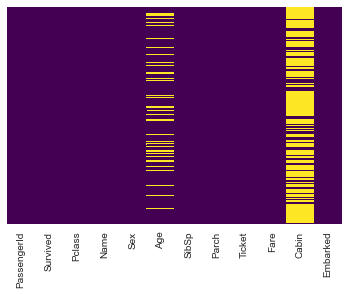

In [253]:
sns.heatmap(tod.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [254]:
print('Train data with null:\n',tod.isnull().sum())
print('_--'*20)
print('test data with null:\n\n',tod_test.isnull().sum())

Train data with null:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          674
Embarked         2
dtype: int64
_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--
test data with null:

 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


- <span style='font-family:comic Sans MS; color:navy'>Now we fill or drop the columns:</span>
<div>

In [255]:
for x in tod_sum:    
    #complete with median
    x['Age'].fillna(x['Age'].median(), inplace = True)

    #complete with mode
    x['Embarked'].fillna(x['Embarked'].mode()[0], inplace = True)

    #complete median
    x['Fare'].fillna(x['Fare'].median(), inplace = True)

#delete the cabin feature/column and others previously stated to exclude in train dataset
dropC = ['PassengerId','Cabin', 'Ticket']
tod.drop(dropC, axis=1, inplace = True)
tod_test.drop(dropC,axis=1,inplace = True)
# Cabin column has a lot of missing values, we will use the availble values to create a new feature and will drop Cabin

In [256]:
# check again for missing value
print('Train columns with null values: \n', tod.isnull().sum())
print("_--"*20)
print (tod.info())

print("_--"*20)

print('Test/Validation columns with null values: \n', tod_test.isnull().sum())
print("_--"*20)
print (tod_test.info())


Train columns with null values: 
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--
<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    int64  
 1   Pclass    876 non-null    int64  
 2   Name      876 non-null    object 
 3   Sex       876 non-null    object 
 4   Age       876 non-null    float64
 5   SibSp     876 non-null    int64  
 6   Parch     876 non-null    int64  
 7   Fare      876 non-null    float64
 8   Embarked  876 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 68.4+ KB
None
_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--
Test/Validation columns with null values: 
 Pclass      0
Name        0
Sex         0
Age         0
SibS

# <span style="font-family:Comic Sans MS; color:navy"><h5>6:Exploratory Data Analysis</h5></span>

### <span style="font-family:Comic Sans MS; color:navy"><h6>The meaning of the words in the columns</h6></span>
- <span style='font-family:comic Sans MS; color:navy'>survival - Survival (0 = No; 1 = Yes</span>
- <span style='font-family:comic Sans MS; color:navy'>class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)</span>
- <span style='font-family:comic Sans MS; color:navy'>name - Name</span>
- <span style='font-family:comic Sans MS; color:navy'>sex - Sex</span>
- <span style='font-family:comic Sans MS; color:navy'>age - Age</span>
- <span style='font-family:comic Sans MS; color:navy'>sibsp - Number of Siblings/Spouses Aboard</span>
- <span style='font-family:comic Sans MS; color:navy'>parch - Number of Parents/Children Aboard</span>
- <span style='font-family:comic Sans MS; color:navy'>ticket - Ticket Number</span>
- <span style='font-family:comic Sans MS; color:navy'>fare - Passenger Fare</span>
- <span style='font-family:comic Sans MS; color:navy'>cabin - Cabin</span>
- <span style='font-family:comic Sans MS; color:navy'>embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</span>
- <span style='font-family:comic Sans MS; color:navy'>boat - Lifeboat (if survived)</span>
- <span style='font-family:comic Sans MS; color:navy'>body - Body number (if did not survive and body was recovered)</span>


















###  <span style='font-family:comic Sans MS; color:navy'>How many people survive:</span>
<div>

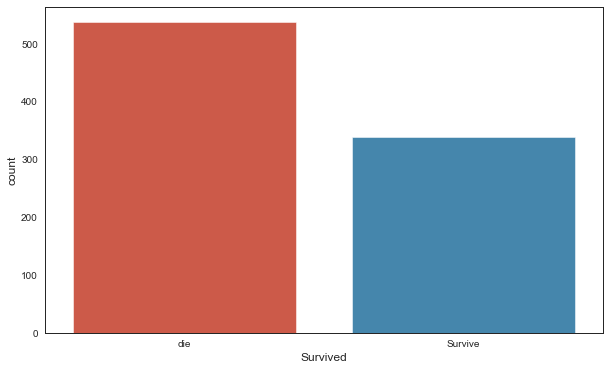

In [257]:
plt.figure(figsize=(10,6))
sns.countplot('Survived',data=tod)
sns.set_style('whitegrid')
plt.xticks([0,1],['die','Survive'])
plt.show()

###  <span style='font-family:comic Sans MS; color:navy'>Passenger Class:</span>
<div>
<div>

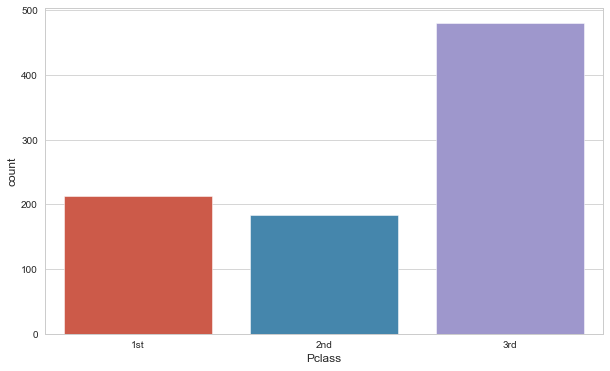

In [258]:
plt.figure(figsize=(10,6))
sns.countplot('Pclass',data=tod)
sns.set_style('whitegrid')
plt.xticks([0,1,2],['1st','2nd','3rd'])
plt.show()

###  <span style='font-family:comic Sans MS; color:navy'>How many passengers were men and how many were women:</span>
<div>

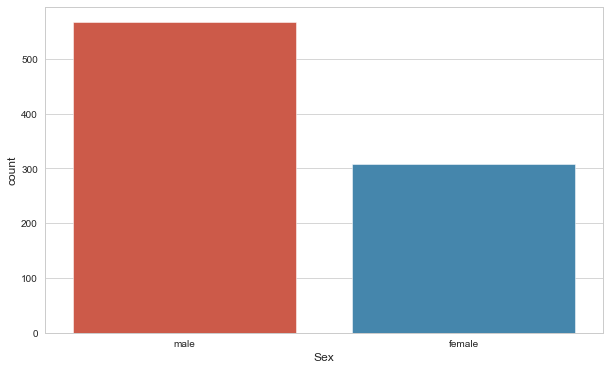

In [259]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot('Sex',data=tod)
plt.show()

###  <span style='font-family:comic Sans MS; color:navy'>Age category of ship passengers:</span>
<div>

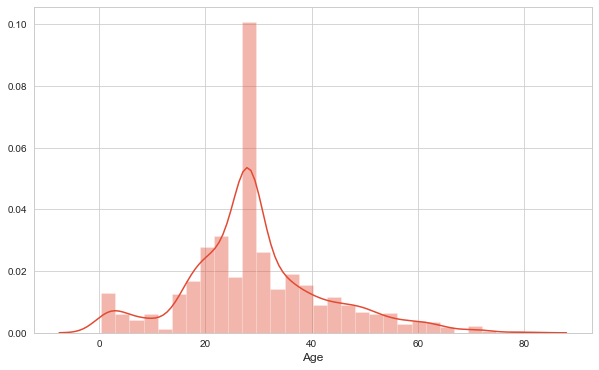

In [260]:
# penguins = sns.load_dataset("penguins")
# sns.displot(data=penguins, x="flipper_length_mm")
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.distplot(tod['Age'],kde=True,bins=30)
plt.show()

<span style='font-family:comic Sans MS; color:navy'>According to the graph, it can be said that a large number of passengers were between 20 and 40 years old</span>
<div>

###  <span style='font-family:comic Sans MS; color:navy'>Number of Siblings/Spouses Aboard:</span>
<div>

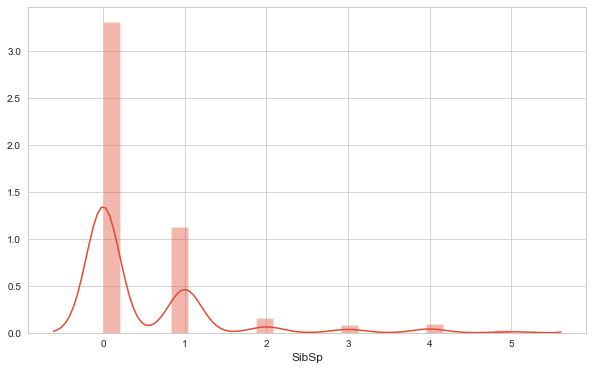

In [261]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.distplot(tod['SibSp'],kde=True)
plt.show()

###  <span style='font-family:comic Sans MS; color:navy'>Number of Parents/Children Aboard:</span>
<div>

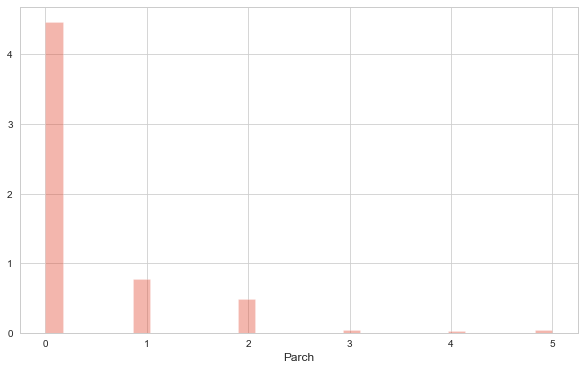

In [262]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.distplot(tod['Parch'])
plt.show()

###  <span style='font-family:comic Sans MS; color:navy'>Passenger Fare:</span>
<div>

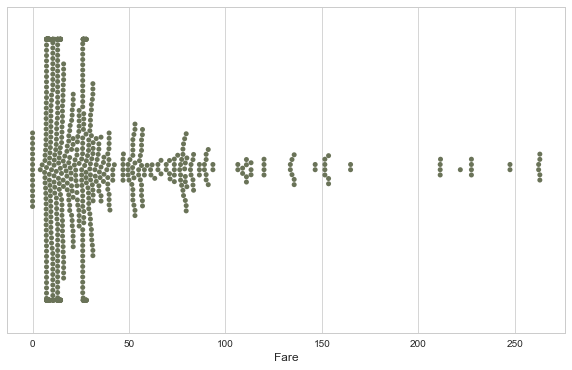

In [263]:
plt.figure(figsize=(10,6))
sns.swarmplot(tod['Fare'],color='#6A7358')
plt.show()

###  <span style='font-family:comic Sans MS; color:navy'>Port of Embarkation:</span>
<div>


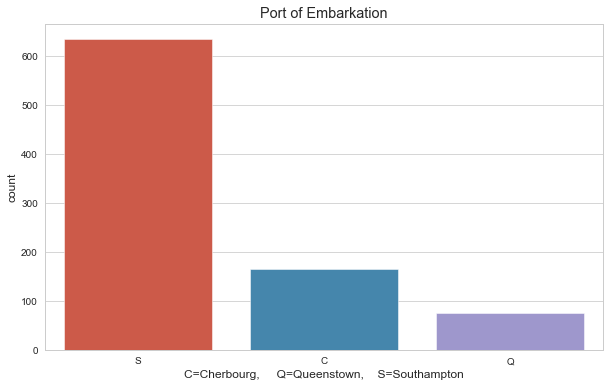

In [264]:
plt.figure(figsize=(10,6))
sns.countplot('Embarked',data=tod)
sns.set_style('whitegrid')
plt.xlabel('C=Cherbourg,     Q=Queenstown,    S=Southampton')
plt.title('Port of Embarkation')
plt.show()

###  <span style='font-family:comic Sans MS; color:navy'>Which class of people was more saved or drowned?:</span>
<div>

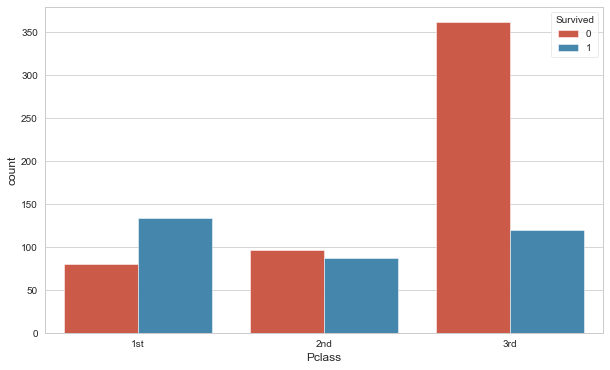

In [265]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot('Pclass',hue='Survived',data=tod)
plt.xticks([0,1,2],['1st','2nd','3rd'])
plt.show()

- <span style='font-family:comic Sans MS; color:navy'>Pclass has negative correlation because Pclass is numbered 1, 2, 3 (high, medium, low), but results to an invers survivability (class 3 = lower chance to survive, class 1 = higher chance)</span>

###  <span style='font-family:comic Sans MS; color:navy'>From which gender class are more saved or died?:</span>
<div>

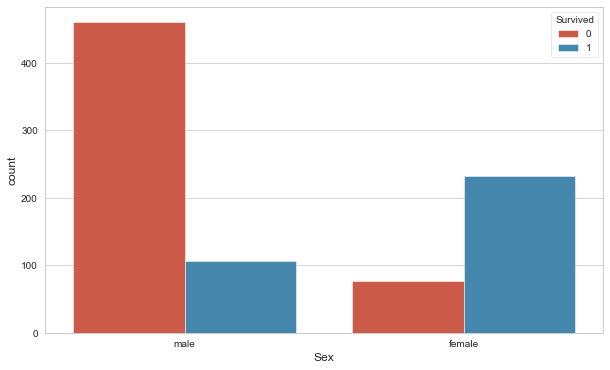

In [266]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot('Sex',hue='Survived',data=tod)
plt.show()

###  <span style='font-family:comic Sans MS; color:navy'>Age and their Class:</span>
<div>

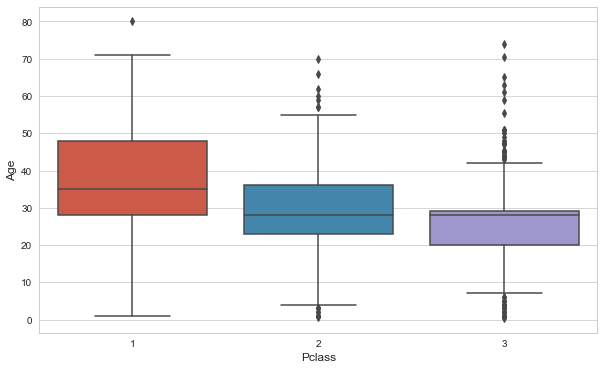

In [267]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age',data=tod)
plt.show()

###  <span style='font-family:comic Sans MS; color:navy'>From which class to survive more, by distinguishing male and female and there Age:</span>
<div>

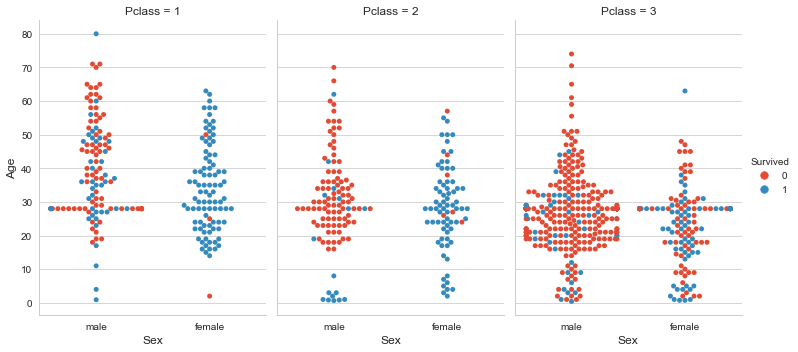

In [268]:
sns.catplot(
    data=tod, kind="swarm",
    x='Sex', y='Age', hue="Survived", col="Pclass",
    aspect=.7
)
plt.show()

## <span style="font-family:Comic Sans MS; color:navy"><h5>6.1:correlatin</h5></span>

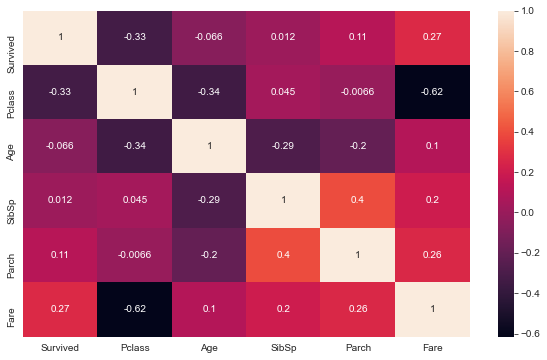

In [269]:
plt.figure(figsize=(10,6))
sns.heatmap(tod.corr(),annot=True)
plt.show()

### <span style="font-family:Comic Sans MS; color:navy"><h5>6.1.1:Unprocessed data correlation</h5></span>

In [270]:
tod.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.268979
Parch       0.111698
SibSp       0.011910
Age        -0.065738
Pclass     -0.329091
Name: Survived, dtype: float64

- <span style="font-family:Comic Sans MS; color:navy"><h5>As we can see, Fare and PClass have the highest correlation with Survived, it seems higher class (also higher Fare) had priority to embark the lifeboats</h5></span>

## <span style="font-family:Comic Sans MS; color:navy"><h5>6.2:Pairplot</h5></span>

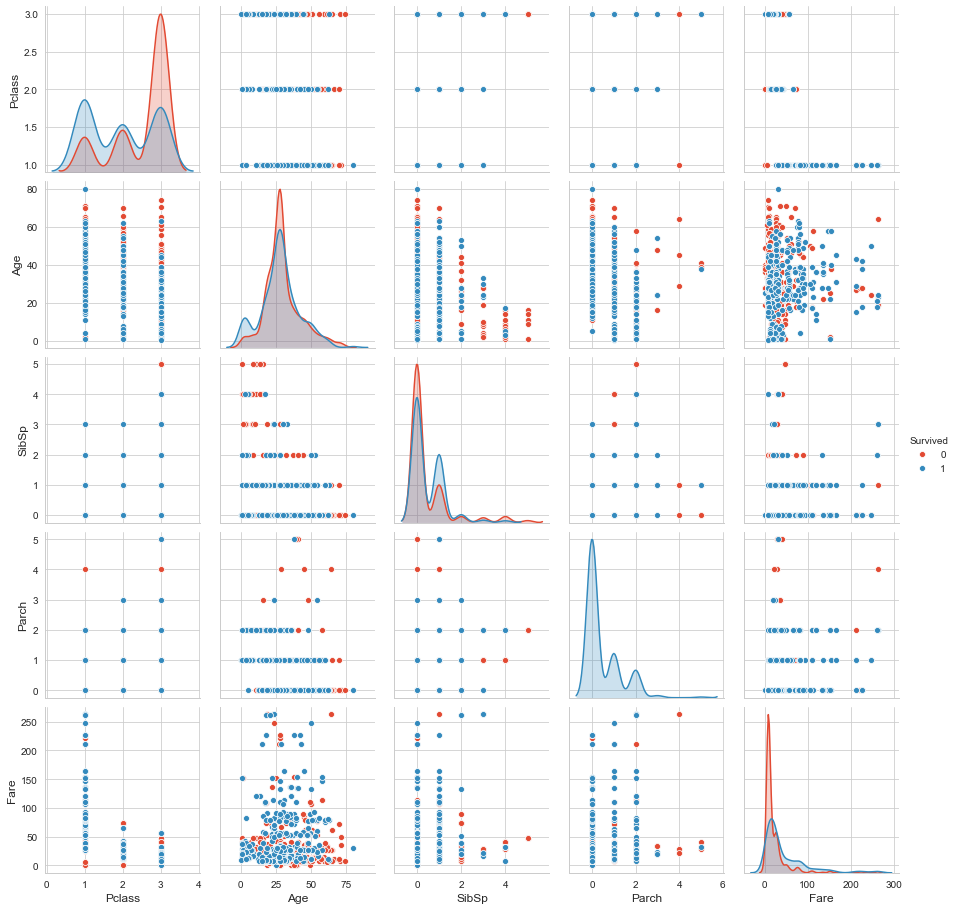

In [271]:
sns.pairplot(hue='Survived',data=tod)
plt.show()

# <span style="font-family:Comic Sans MS; color:navy"><h5>7:Modeling</h5></span>
- <span style='font-family:comic Sans MS; color:navy'>In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy</span>

In [272]:
sex = pd.get_dummies(tod['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [273]:
embark = pd.get_dummies(tod['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [281]:
pclass = pd.get_dummies(tod['Pclass'])
pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [275]:
tod =pd.concat([tod,sex,embark],axis=1)
tod.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0,1


In [276]:
tod.drop(['Name',"Sex","Embarked"],axis=1,inplace=True)
tod.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [291]:
x= tod.drop('Survived',axis=1)
y= tod['Survived'] #trying to predict

In [292]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [293]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [297]:
predict = LR.predict(x_test)
predict[:40]

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [302]:
rpt = classification_report(y_test,predict)
print(rpt)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       161
           1       0.68      0.75      0.71       102

    accuracy                           0.76       263
   macro avg       0.75      0.76      0.76       263
weighted avg       0.77      0.76      0.77       263



In [307]:
confusion_matrix(y_test,predict)

array([[125,  36],
       [ 26,  76]], dtype=int64)